In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Softmax
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/Users/yaochen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# load data 
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')
test_features = pd.read_csv('test_features.csv')

In [3]:
def preprocess_data_robust(df, max_length):
    valid_chars = {'A', 'C', 'G', 'T'}  # valid characters
    # replace invalid characters and pad sequences
    def clean_and_pad_sequence(seq):
        cleaned_seq = ''.join([char if char in valid_chars else 'N' for char in seq])
        return cleaned_seq.ljust(max_length, 'N')
    # Clean and pad all sequences in the dataset
    df['cleaned_data'] = df['data'].apply(clean_and_pad_sequence)
    # One-hot encode the sequences
    one_hot = {'A': [1, 0, 0, 0, 0], 'C': [0, 1, 0, 0, 0], 'G': [0, 0, 1, 0, 0], 'T': [0, 0, 0, 1, 0], 'N': [0, 0, 0, 0, 1]}
    return np.array([np.array([one_hot[char] for char in seq]) for seq in df['cleaned_data']])

In [4]:
max_length = max(train_features['data'].apply(len).max(), test_features['data'].apply(len).max())
X_train = preprocess_data_robust(train_features, max_length)
X_test = preprocess_data_robust(test_features, max_length)

X_train.shape, X_test.shape

((16969, 1058, 5), (4243, 1058, 5))

In [5]:
y_train = to_categorical(train_labels['labels'])

In [6]:
# the 1-D CNN model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 5)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
213/213 [==============================] - 5s 24ms/step - loss: 6.5061 - accuracy: 0.0555 - val_loss: 5.3292 - val_accuracy: 0.1567
Epoch 2/10
213/213 [==============================] - 5s 22ms/step - loss: 2.5482 - accuracy: 0.5458 - val_loss: 1.2038 - val_accuracy: 0.7640
Epoch 3/10
213/213 [==============================] - 5s 22ms/step - loss: 0.4826 - accuracy: 0.8986 - val_loss: 0.5670 - val_accuracy: 0.9101
Epoch 4/10
213/213 [==============================] - 5s 22ms/step - loss: 0.2316 - accuracy: 0.9500 - val_loss: 0.4610 - val_accuracy: 0.9228
Epoch 5/10
213/213 [==============================] - 5s 21ms/step - loss: 0.1406 - accuracy: 0.9685 - val_loss: 0.4463 - val_accuracy: 0.9364
Epoch 6/10
213/213 [==============================] - 5s 22ms/step - loss: 0.1029 - accuracy: 0.9763 - val_loss: 0.4909 - val_accuracy: 0.9337
Epoch 7/10
213/213 [==============================] - 4s 21ms/step - loss: 0.0651 - accuracy: 0.9842 - val_loss: 0.4604 - val_accuracy: 0.9440

In [9]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


133/133 [==============================] - 1s 4ms/step


In [10]:
pd.DataFrame({'id': test_features['ids'], 'label': predicted_labels}).to_csv('predictions.csv', index=False)

Epoch 1/10
213/213 [==============================] - 5s 23ms/step - loss: 0.0382 - accuracy: 0.9901 - val_loss: 0.4884 - val_accuracy: 0.9529
Epoch 2/10
213/213 [==============================] - 4s 21ms/step - loss: 0.0344 - accuracy: 0.9920 - val_loss: 0.4858 - val_accuracy: 0.9529
Epoch 3/10
213/213 [==============================] - 4s 21ms/step - loss: 0.0506 - accuracy: 0.9881 - val_loss: 0.4747 - val_accuracy: 0.9473
Epoch 4/10
213/213 [==============================] - 4s 21ms/step - loss: 0.0541 - accuracy: 0.9859 - val_loss: 0.5276 - val_accuracy: 0.9420
Epoch 5/10
213/213 [==============================] - 5s 21ms/step - loss: 0.0465 - accuracy: 0.9888 - val_loss: 0.5497 - val_accuracy: 0.9446
Epoch 6/10
213/213 [==============================] - 4s 21ms/step - loss: 0.0744 - accuracy: 0.9800 - val_loss: 0.5082 - val_accuracy: 0.9381
Epoch 7/10
213/213 [==============================] - 4s 21ms/step - loss: 0.0356 - accuracy: 0.9895 - val_loss: 0.4674 - val_accuracy: 0.9532

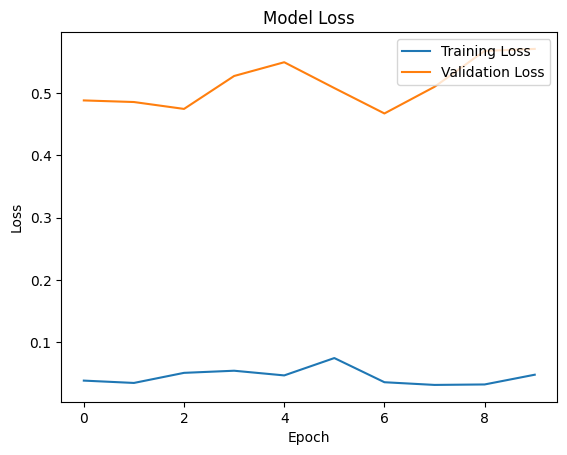

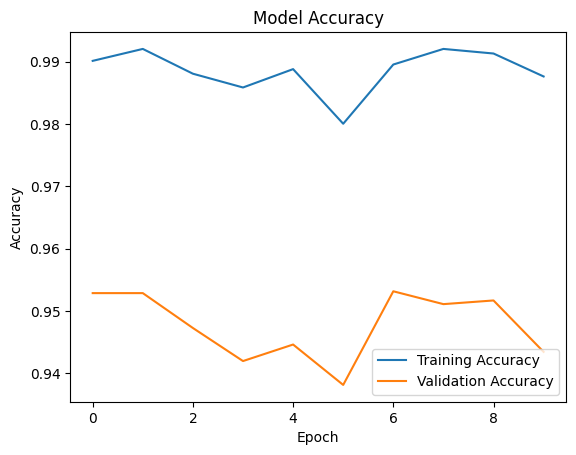

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()